# **Predictive Modeling for Type II Diabetes**
### Salma Chaudry and Shreya Sudini
### DATA 606, Dr. Tony Diana

**Project Goals:**
*   Utilize predictive modeling to enhance Diabetes management
*   Address Diabetes, a serious epidemic, impacting millions of individuals who are often unaware
of their risk, making predictive modeling crucial for timely and critical intervention

**Methodology:**
*   Employing Neural Networks, Gradient Boosting algorithm, CATBoost, and Logistic Regression (LR) to develop predictive models for identifying individuals at high risk of Type II Diabetes.
* Models evaluated based on metrics like accuracy, precision, and recall
* Analyze contributing factors to Type II Diabetes and provide actionable recommendations for intervention strategies

**Expected Results:**
*   Neural Networks may give out best results out of the 4 algorithms

**Dataset Link:**
*   https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data



##**Uploading Data**

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

##reference this below
#'/content/drive/My Drive/capstone'

%cd '/content/drive/My Drive/capstone'

Mounted at /content/drive
/content/drive/My Drive/capstone


#**train.csv**
##This dataset will be the training dataset
*   Already balanced; good candidate for binary classification model
*   Prevents bias
*   Model distinguishes effectively between classes



In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
train_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


###21 feature variables; 22 columns total
###70,692 total survey responses



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
train_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


###Summary Statistics for train_df

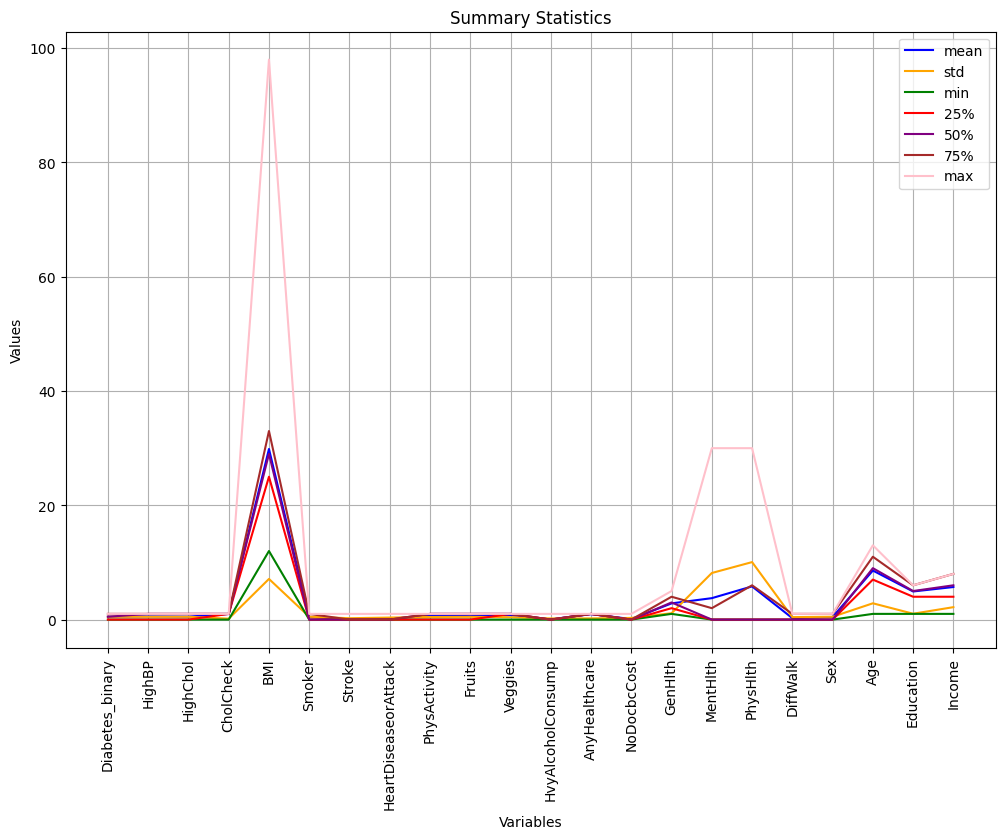

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stats = train_df.describe().T.drop(columns='count')
plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

for i, metric in enumerate(stats.columns):
    plt.plot(stats.index, stats[metric], label=metric, color=colors[i])

plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Summary Statistics')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

###Removing Duplicate Data

In [ ]:
# Find and remove duplicate rows based on all columns
train_df_no_duplicates = train_df.drop_duplicates()

# Print the shape of the DataFrame before and after removing duplicates
print('Shape of DataFrame before removing duplicates:', train_df.shape)
print('Shape of DataFrame after removing duplicates:', train_df_no_duplicates.shape)

# Assign train_df_no_duplicates to train_df
# Now train_df contains no duplicates
train_df = train_df_no_duplicates

train_df.shape
print(f'Current shape of train_df: {train_df.shape}')

Shape of DataFrame before removing duplicates: (70692, 22)
Shape of DataFrame after removing duplicates: (69057, 22)
Current shape of train_df: (69057, 22)


###Showing unique values in each column

In [ ]:
#iterate over each column in train_df
for column in train_df.columns:
    #unique values in the column
    unique_values = train_df[column].unique()

    #column name and its unique values
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    print(".........................")

Unique values in column 'Diabetes_binary':
0.0
1.0
.........................
Unique values in column 'HighBP':
1.0
0.0
.........................
Unique values in column 'HighChol':
0.0
1.0
.........................
Unique values in column 'CholCheck':
1.0
0.0
.........................
Unique values in column 'BMI':
26.0
28.0
29.0
18.0
31.0
32.0
27.0
24.0
21.0
58.0
30.0
20.0
22.0
38.0
40.0
25.0
36.0
47.0
19.0
37.0
41.0
23.0
34.0
35.0
42.0
17.0
33.0
44.0
15.0
52.0
69.0
56.0
45.0
39.0
92.0
53.0
98.0
50.0
46.0
79.0
48.0
16.0
63.0
72.0
54.0
49.0
68.0
43.0
84.0
73.0
76.0
55.0
51.0
75.0
57.0
60.0
12.0
77.0
82.0
67.0
71.0
61.0
14.0
81.0
59.0
86.0
13.0
87.0
65.0
95.0
89.0
62.0
64.0
66.0
85.0
70.0
83.0
80.0
78.0
74.0
.........................
Unique values in column 'Smoker':
0.0
1.0
.........................
Unique values in column 'Stroke':
0.0
1.0
.........................
Unique values in column 'HeartDiseaseorAttack':
0.0
1.0
.........................
Unique values in column 'PhysActivity':

###Removing Irrelevant Columns
*   Many unique values/unimportant data can impact model accuracy and performance

In [ ]:
train_df.drop(columns=['MentHlth','PhysHlth','GenHlth','DiffWalk','AnyHealthcare','NoDocbcCost'],inplace=True)
train_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.0,5.0,8.0


###Correlation Analysis
*  The most effected, more risk at getting the Diabetes is the ones with HighBP. And the other columns that have more positive correlation are HighCol, BMI and Age. The highest negative correlation is with Income, Education and PhysActivity.

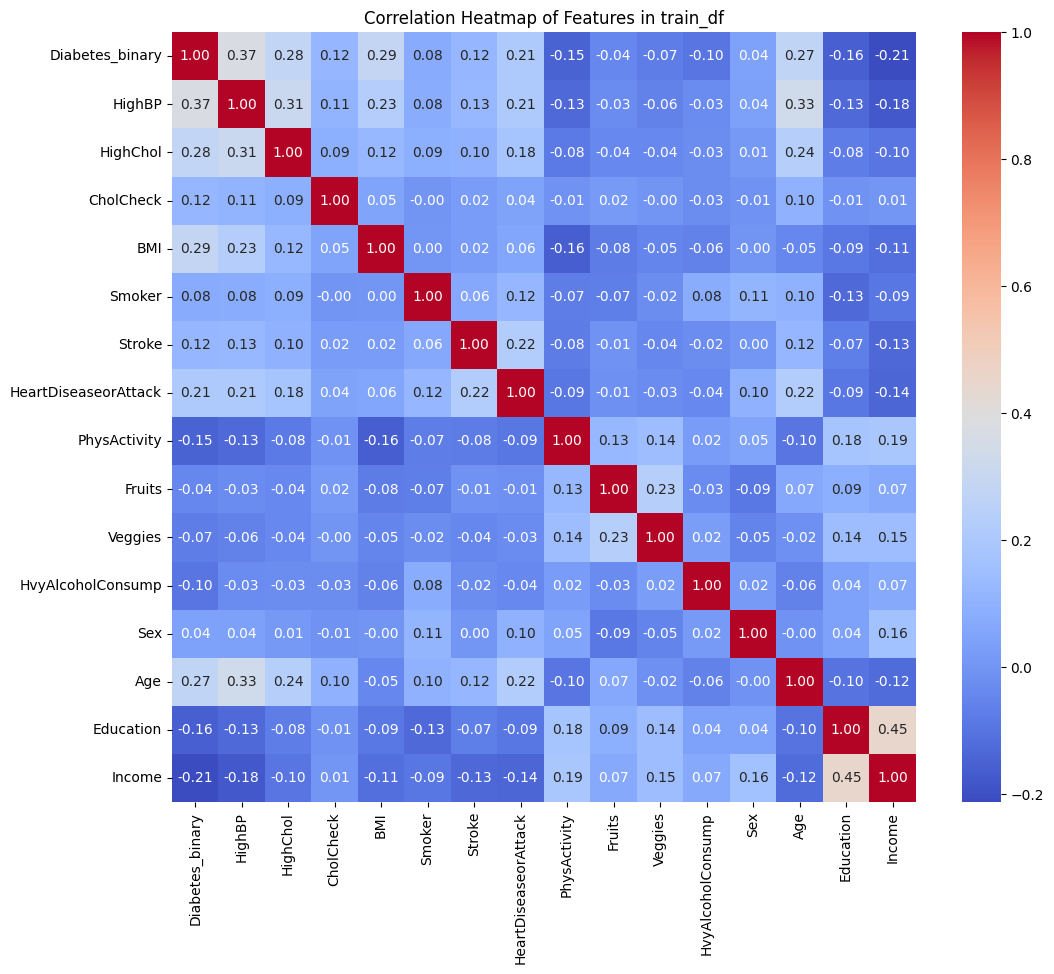

In [ ]:
corr_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Features in train_df')
plt.show()

###Age Distribution
####Majority of those in dataset are 65-59 years old

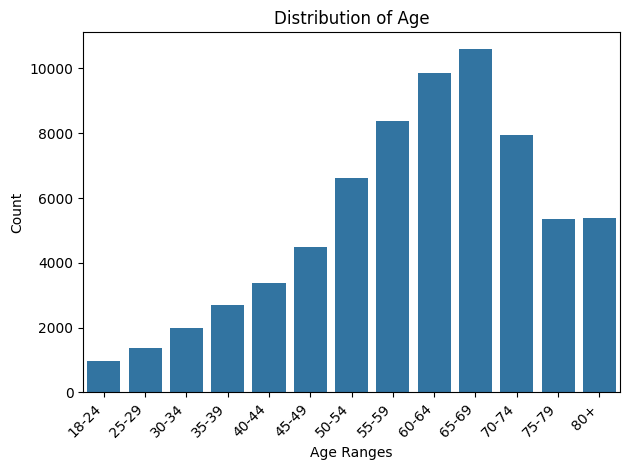

In [ ]:
import seaborn as sns
# Define the age ranges
age_ranges = {
    0: '18-24',
    1: '25-29',
    2: '30-34',
    3: '35-39',
    4: '40-44',
    5: '45-49',
    6: '50-54',
    7: '55-59',
    8: '60-64',
    9: '65-69',
    10: '70-74',
    11: '75-79',
    12: '80+'
}

# Create the count plot
sns.countplot(x='Age', data = train_df)

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 13), labels=[age_ranges[i] for i in range(0, 13)], rotation = 45, ha='right')

# Set plot title and display the plot
plt.title('Distribution of Age')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

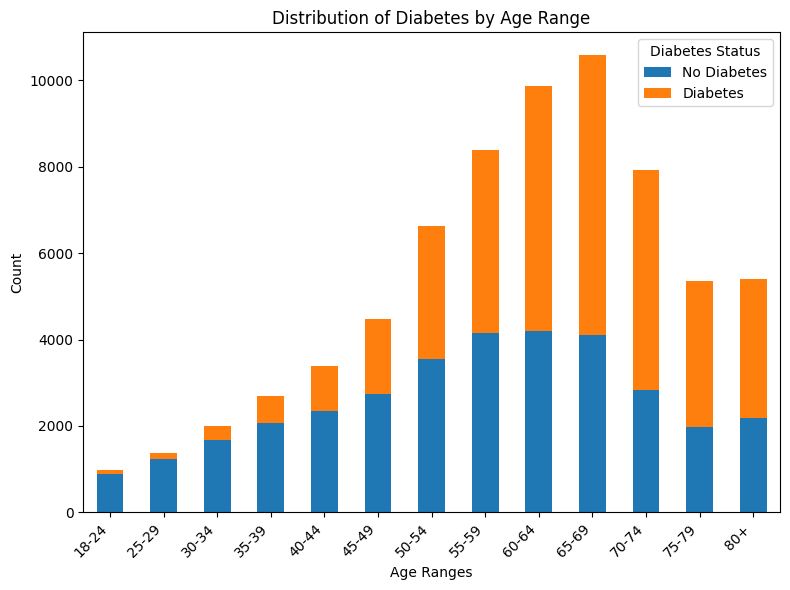

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
age_diabetes_df = train_df.groupby(['Age', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plot the grouped bar plot
age_diabetes_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 13), labels=[age_ranges[i] for i in range(0, 13)], rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Age Range')
plt.xlabel('Age Ranges')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

###Distribution of Blood Pressure with Diabetes

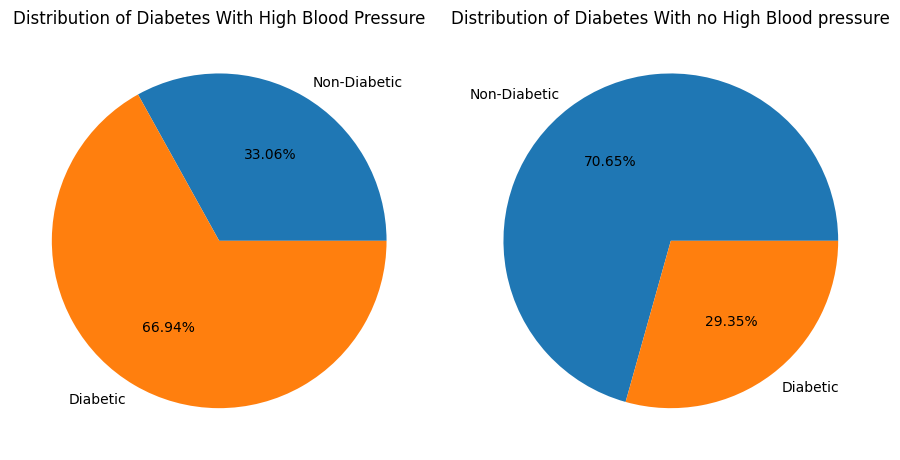

In [ ]:
import matplotlib.pyplot as plt

#occurrences of each value in the 'Diabetes_binary' column among High BP(0) and Low BP(1)
diabetes_counts = train_df.groupby('HighBP')['Diabetes_binary'].value_counts().unstack(fill_value=0)

labels = ['Non-Diabetic', 'Diabetic']

#pie chart for HighBP
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.pie(diabetes_counts.loc[1], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes With High Blood Pressure')

#pie chart for LowBP
plt.subplot(1, 2, 2)
plt.pie(diabetes_counts.loc[0], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes With no High Blood pressure')

plt.tight_layout()
plt.show()

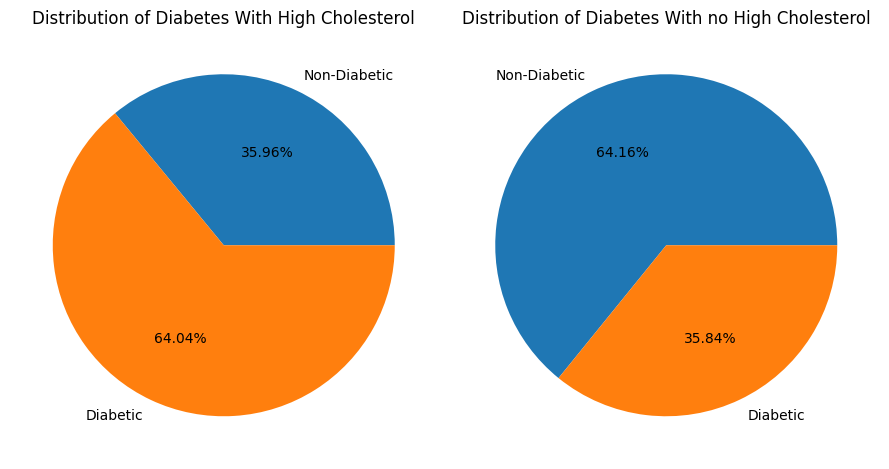

In [ ]:
diabetes_counts = train_df.groupby('HighChol')['Diabetes_binary'].value_counts().unstack(fill_value=0)

labels = ['Non-Diabetic', 'Diabetic']

#pie chart for HighChol
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.pie(diabetes_counts.loc[1], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes With High Cholesterol')

#pie chart for LowChol
plt.subplot(1, 2, 2)
plt.pie(diabetes_counts.loc[0], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes With no High Cholesterol')

plt.tight_layout()
plt.show()

###More females than males



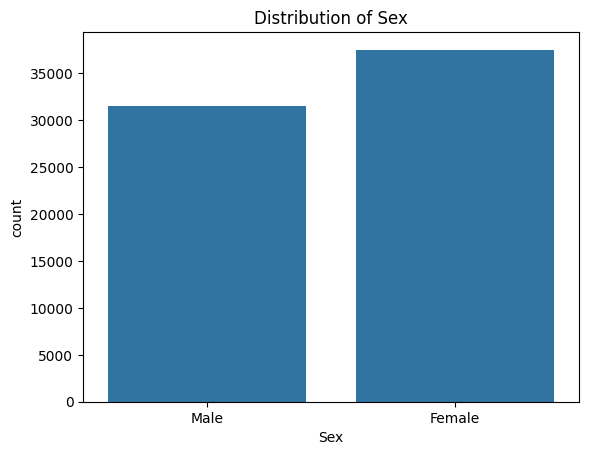

In [ ]:
#rename values
train_df['Sex'] = train_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

sns.countplot(x='Sex', data = train_df)
plt.title('Distribution of Sex')
plt.show()

##Distribution of Income

###Most of the people in dataset make <$35,000

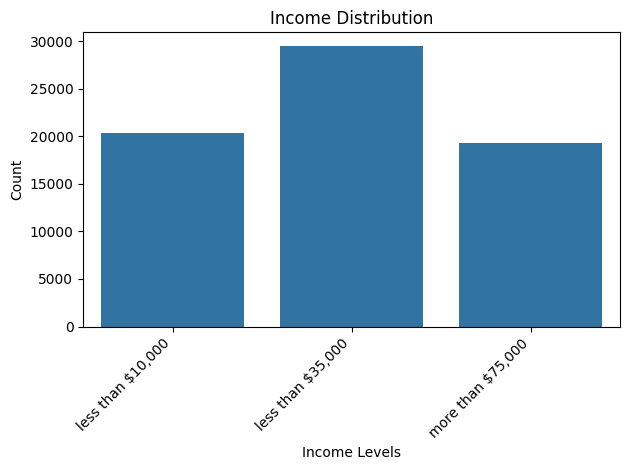

In [ ]:
#transformation using lambda expressions
train_df['Income'] = train_df['Income'].apply(lambda x: 1 if x <= 4 else (2 if x <= 7 else 3))

income_labels = {
    1: 'less than $10,000',
    2: 'less than $35,000',
    3: 'more than $75,000'
}

income_levels = train_df['Income'].unique()
#Count plot for income
sns.countplot(x='Income', data=train_df)

# Set x-axis labels using the extracted income levels
plt.xticks(ticks=range(0, 3), labels=[income_labels[i] for i in range(1, 4)], rotation = 45, ha='right')

# Set plot title and display the plot
plt.title('Income Distribution')
plt.xlabel('Income Levels')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

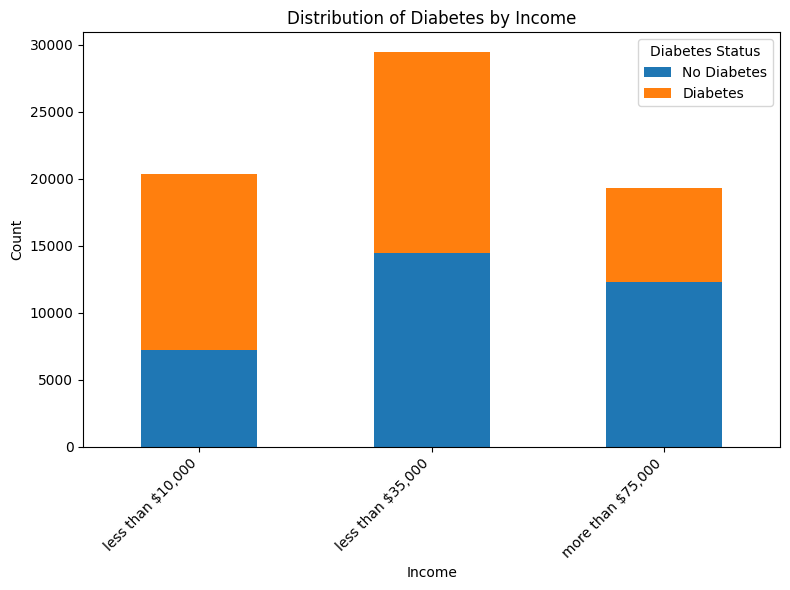

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
income_diabetes_df = train_df.groupby(['Income', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plot the grouped bar plot
income_diabetes_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 3), labels=[income_labels[i] for i in range(1, 4)], rotation = 45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Income')
plt.xlabel('Income')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

##Distribution of Education

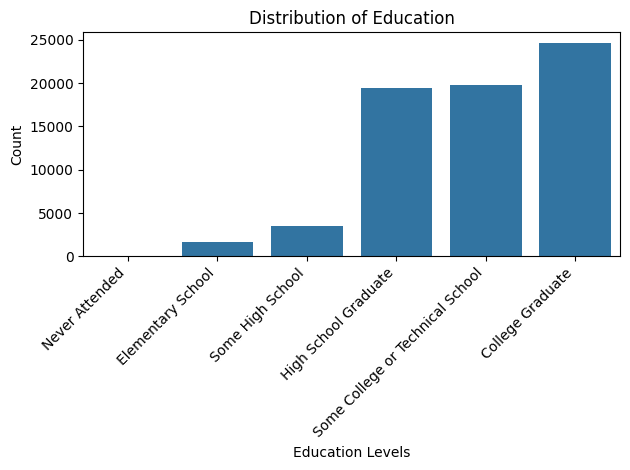

In [ ]:
education_labels = {
    1: 'Never Attended',
    2: 'Elementary School',
    3: 'Some High School',
    4: 'High School Graduate',
    5: 'Some College or Technical School',
    6: 'College Graduate'
}

sns.countplot(x='Education', data=train_df)

# Set x-axis labels using the education level dictionary
plt.xticks(ticks=range(0, 6), labels=[education_labels[i] for i in range(1, 7)], rotation = 45, ha='right')

plt.title('Distribution of Education')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

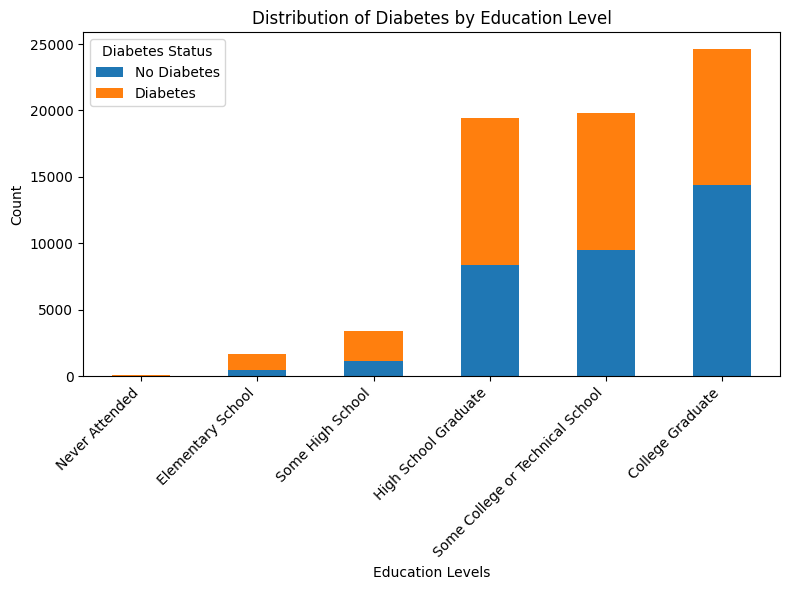

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
education_diabetes_df = train_df.groupby(['Education', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plot the grouped bar plot
education_diabetes_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 6), labels=[education_labels[i] for i in range(1,7)], rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Education Level')
plt.xlabel('Education Levels')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

###BMI has a lot of outliers

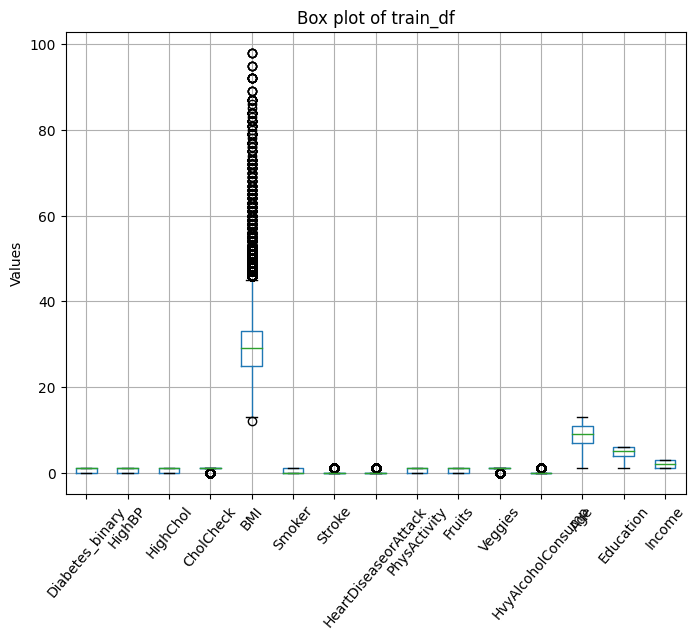

In [ ]:
train_df.boxplot(figsize=(8, 6))
plt.title('Box plot of train_df')
plt.ylabel('Values')
plt.xticks(rotation=50)
plt.show()

###Since there are no null values, imputation is **not** needed

In [ ]:
#no null values found
train_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#**test.csv**
##This dataset will be the testing dataset
*   Cleaning must be done to remove noise/inconsistencies before testing
*   Since the cleaning/EDA process takes time, this will be the testing set
*   After training the model on train.csv, performance can be evaluated on test.csv
*   Testing on an unbalanced dataset can reveal how well the model performs in real-world scenarios where class distributions are possibly skewed

In [ ]:
#unbalanced dataset

test_df = pd.read_csv('test.csv')
test_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


###21 feature variables; 22 columns total
###253,680 total survey responses

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
test_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


###Removing Duplicate Data

In [ ]:
# Find and remove duplicate rows based on all columns
test_df_no_duplicates = test_df.drop_duplicates()

# Print the shape of the DataFrame before and after removing duplicates
print('Shape of DataFrame before removing duplicates:', test_df.shape)
print('Shape of DataFrame after removing duplicates:', test_df_no_duplicates.shape)

# Assign test_df_no_duplicates to test_df
# Now test_df contains no duplicates
test_df = test_df_no_duplicates

print(f'Current shape of test_df: {test_df.shape}')

Shape of DataFrame before removing duplicates: (253680, 22)
Shape of DataFrame after removing duplicates: (229474, 22)
Current shape of test_df: (229474, 22)


###Showing unique values

In [ ]:
# Iterate over each column in test_df
for column in test_df.columns:
    #unique values in the column
    unique_values = test_df[column].unique()

    #column name and its unique values
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    print(".........................")

Unique values in column 'Diabetes_binary':
0.0
1.0
.........................
Unique values in column 'HighBP':
1.0
0.0
.........................
Unique values in column 'HighChol':
1.0
0.0
.........................
Unique values in column 'CholCheck':
1.0
0.0
.........................
Unique values in column 'BMI':
40.0
25.0
28.0
27.0
24.0
30.0
34.0
26.0
33.0
21.0
23.0
22.0
38.0
32.0
37.0
31.0
29.0
20.0
35.0
45.0
39.0
19.0
47.0
18.0
36.0
43.0
55.0
49.0
42.0
17.0
16.0
41.0
44.0
50.0
59.0
48.0
52.0
46.0
54.0
57.0
53.0
14.0
15.0
51.0
58.0
63.0
61.0
56.0
74.0
62.0
64.0
66.0
73.0
85.0
60.0
67.0
65.0
70.0
82.0
79.0
92.0
68.0
72.0
88.0
96.0
13.0
81.0
71.0
75.0
12.0
77.0
69.0
76.0
87.0
89.0
84.0
95.0
98.0
91.0
86.0
83.0
80.0
90.0
78.0
.........................
Unique values in column 'Smoker':
1.0
0.0
.........................
Unique values in column 'Stroke':
0.0
1.0
.........................
Unique values in column 'HeartDiseaseorAttack':
0.0
1.0
.........................
Unique values in co

###Removing Irrelevant Columns

In [ ]:
test_df.drop(columns=['MentHlth','PhysHlth','GenHlth','DiffWalk','AnyHealthcare','NoDocbcCost'],inplace=True)
test_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0,5.0,4.0


###Most individuals **do not** have diabetes

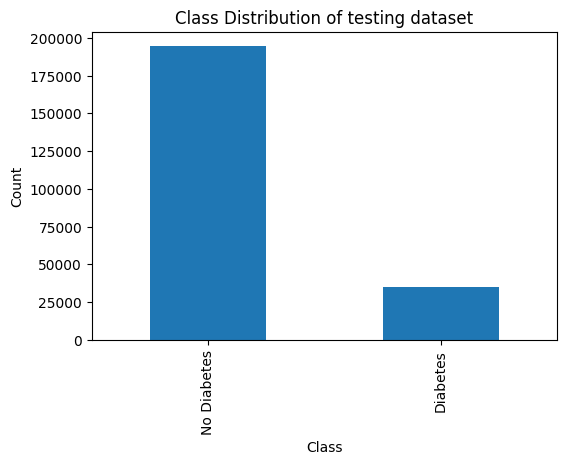

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

In [ ]:
#Rename values
test_df['Diabetes_binary'] = test_df['Diabetes_binary'].replace({0.0: 'No Diabetes', 1.0: 'Diabetes'})

class_distribution = test_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of testing dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

test_df['Diabetes_binary'].value_counts()

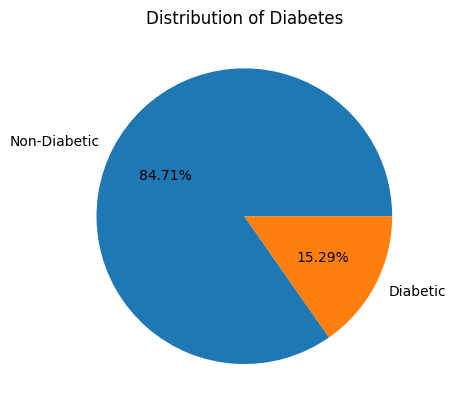

In [ ]:
diabetes_counts = test_df['Diabetes_binary'].value_counts()

labels = ['Non-Diabetic', 'Diabetic']

#plot pie chart
plt.pie(diabetes_counts, labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes')
plt.show()

###For test.csv, majority of individuals are 60-64 years old

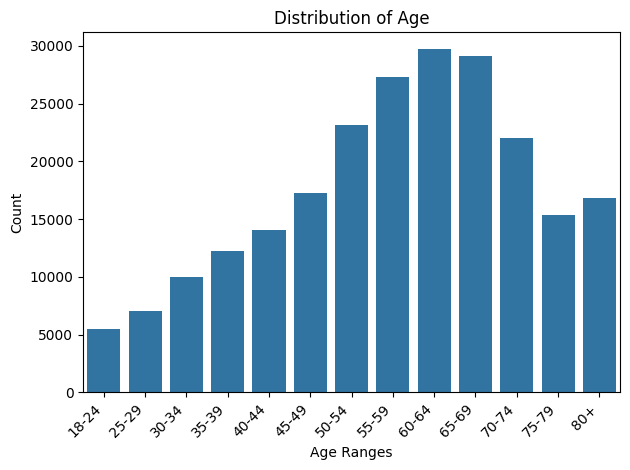

In [ ]:
# Create the count plot
sns.countplot(x='Age', data = test_df)

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 13), labels=[age_ranges[i] for i in range(0, 13)], rotation = 45, ha='right')

# Set plot title and display the plot
plt.title('Distribution of Age')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

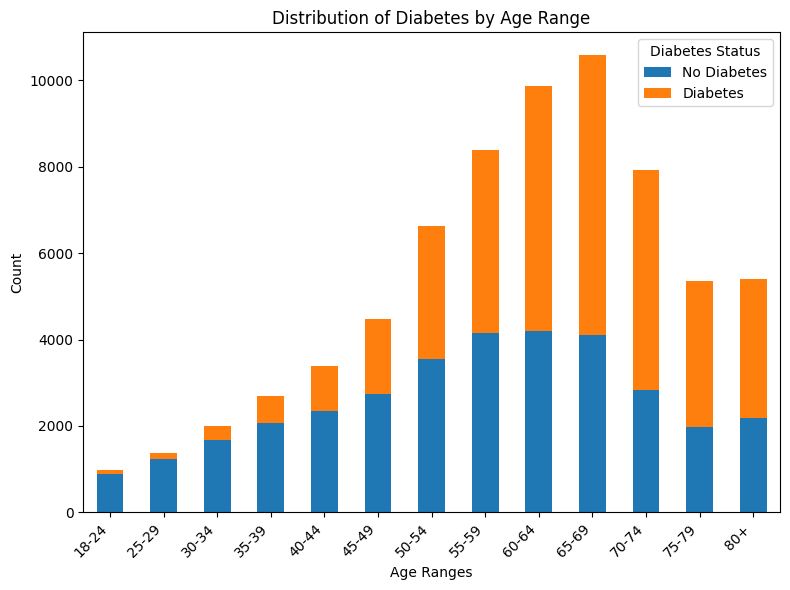

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
age_diabetes_df_test = test_df.groupby(['Age', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plot the grouped bar plot
age_diabetes_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 13), labels=[age_ranges[i] for i in range(0, 13)], rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Age Range')
plt.xlabel('Age Ranges')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

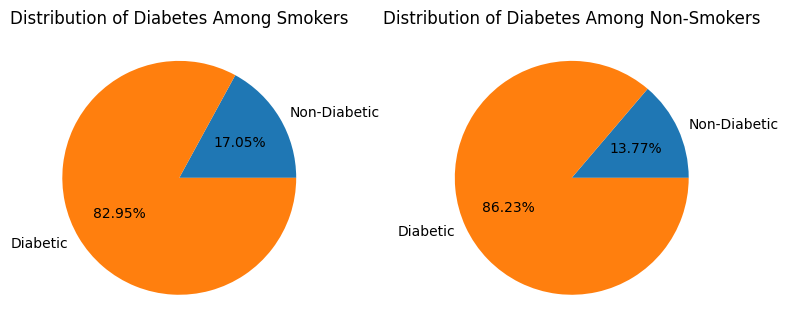

In [ ]:
#occurrences of each value in the 'Diabetes_binary' column among non-smokers (Smoker=0) and smokers (Smoker=1)
diabetes_counts_smoke = test_df.groupby('Smoker')['Diabetes_binary'].value_counts().unstack(fill_value=0)

labels = ['Non-Diabetic', 'Diabetic']

#pie chart for smokers
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)  # Subplot for smokers
plt.pie(diabetes_counts_smoke.loc[1], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes Among Smokers')

#pie chart for non-smokers
plt.subplot(1, 2, 2)  # Subplot for non-smokers
plt.pie(diabetes_counts_smoke.loc[0], labels=labels, autopct='%.02f%%')
plt.title('Distribution of Diabetes Among Non-Smokers')

plt.tight_layout()
plt.show()

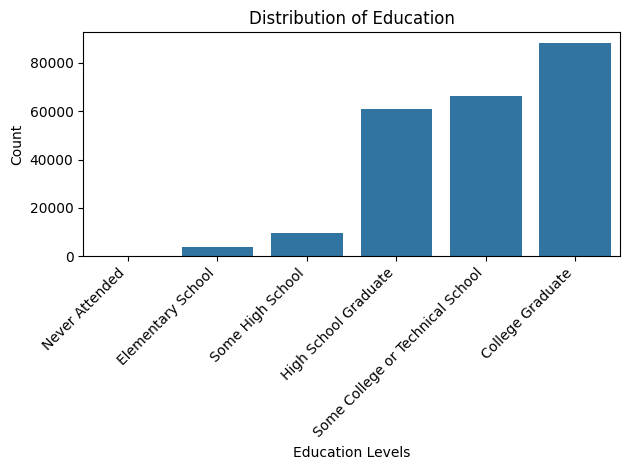

In [ ]:
education_labels = {
    1: 'Never Attended',
    2: 'Elementary School',
    3: 'Some High School',
    4: 'High School Graduate',
    5: 'Some College or Technical School',
    6: 'College Graduate'
}

sns.countplot(x='Education', data=test_df)

# Set x-axis labels using the education level dictionary
plt.xticks(ticks=range(0, 6), labels=[education_labels[i] for i in range(1, 7)], rotation = 45, ha='right')

# Set plot title and display the plot
plt.title('Distribution of Education')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

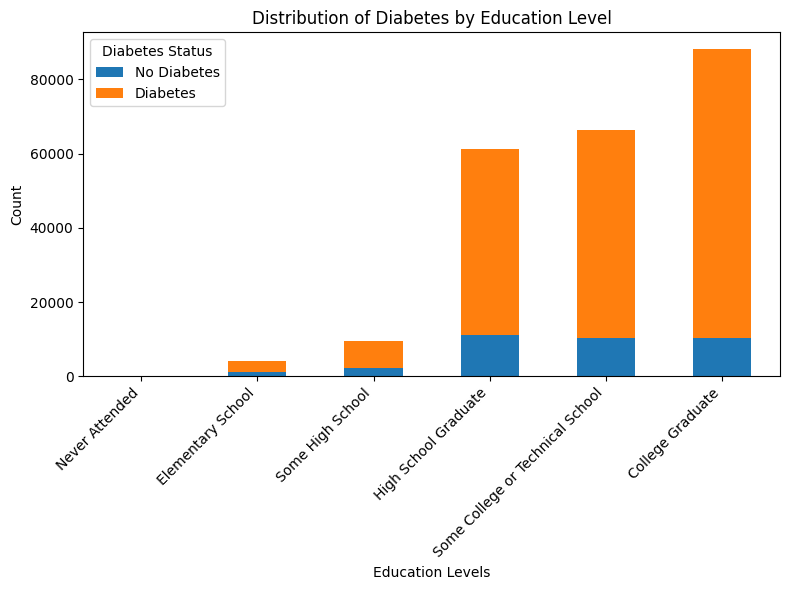

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
education_diabetes_df_test = test_df.groupby(['Education', 'Diabetes_binary']).size().unstack(fill_value=0)

education_diabetes_df_test.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 6), labels=[education_labels[i] for i in range(1,7)], rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Education Level')
plt.xlabel('Education Levels')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

###More females than males

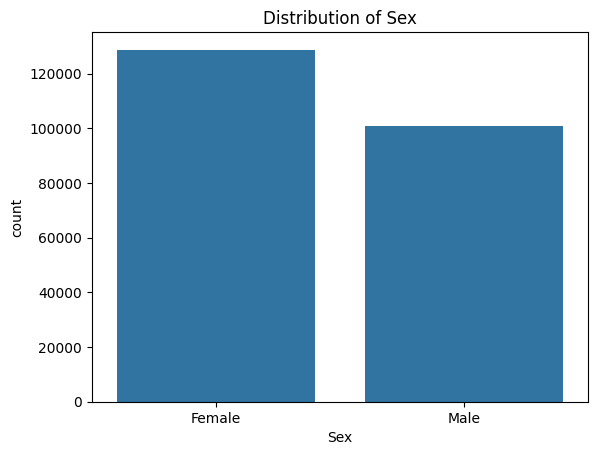

In [ ]:
# Rename values
test_df['Sex'] = test_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot count distribution
sns.countplot(x='Sex', data = test_df)
plt.title('Distribution of Sex')
plt.show()

###Most make <$35,000

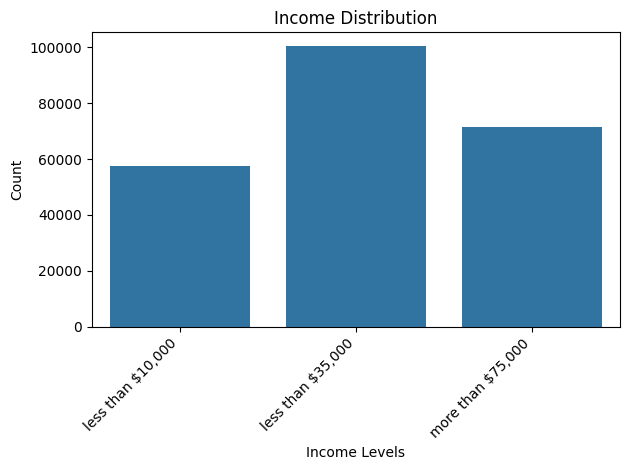

In [ ]:
#transformation using lambda expressions
test_df['Income'] = test_df['Income'].apply(lambda x: 1 if x <= 4 else (2 if x <= 7 else 3))

income_labels = {
    1: 'less than $10,000',
    2: 'less than $35,000',
    3: 'more than $75,000'
}

income_levels = test_df['Income'].unique()

sns.countplot(x='Income', data=test_df)

# Set x-axis labels using the extracted income levels
plt.xticks(ticks=range(0, 3), labels=[income_labels[i] for i in range(1, 4)], rotation = 45, ha='right')

#plot title and display the plot
plt.title('Income Distribution')
plt.xlabel('Income Levels')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

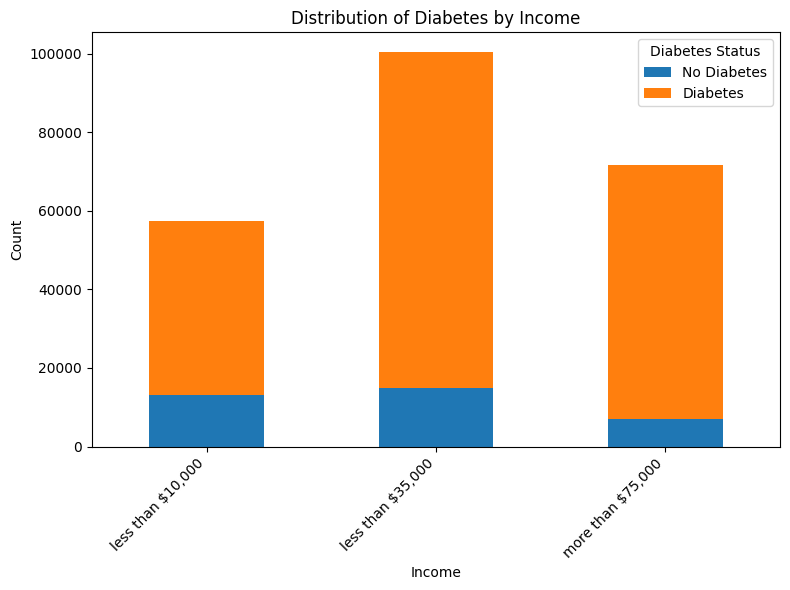

In [ ]:
# Create a new DataFrame with age ranges and diabetes status
income_diabetes_df_test = test_df.groupby(['Income', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plot the grouped bar plot
income_diabetes_df_test.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis labels using the age ranges dictionary
plt.xticks(ticks=range(0, 3), labels=[income_labels[i] for i in range(1, 4)], rotation = 45, ha='right')

# Set plot title and labels
plt.title('Distribution of Diabetes by Income')
plt.xlabel('Income')
plt.ylabel('Count')

# Add legend
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Show plot
plt.tight_layout()
plt.show()

###Since there are no null values, impuation is **not** needed

In [ ]:
test_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#**Handling Class Imbalance**


*   Since duplicates were removed, train_df is now imbalanced
*   Now we need to make sure it is balanced; we will apply SMOTE to balance


###Using SMOTE to balance data

Why use SMOTE?


*   We are using resampling techniques. There are 3 types: undersampling, oversampling and SMOTE(Synthetic Minority Over sampling Techniques).
*   Undersampling: involves randomly removing majority class to balance. We cannot remove the data.
*  Oversampling: involves adding duplicates from minority class, which we do not prefer because we just removed all the duplicates from the data.

SMOTE: involves adding a synthetic value to minority class based on feature similarity with nearest neighbors.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

train_df['Sex'] = train_df['Sex'].replace({'Female':0.0, 'Male':1.0})

X = train_df.drop('Diabetes_binary', axis=1)
y = train_df['Diabetes_binary']

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
train_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'Diabetes_binary': y_resampled})], axis=1)

train_df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income,Diabetes_binary
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,6.0,3,0.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,3,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,6.0,3,0.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,6.0,3,0.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.0,5.0,3,0.0


###Balanced values now after SMOTE

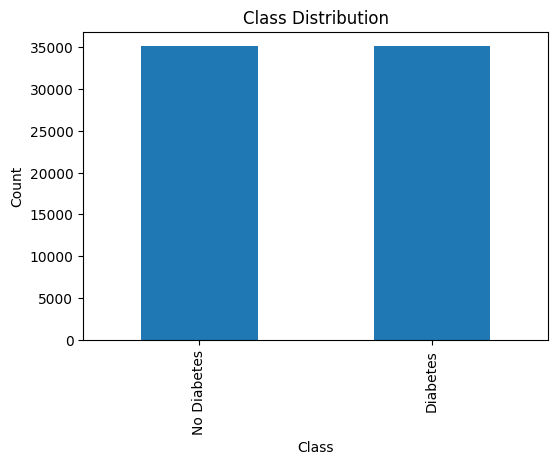

Diabetes_binary
No Diabetes    35097
Diabetes       35097
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

#Rename values
train_df['Diabetes_binary'] = train_df['Diabetes_binary'].replace({0.0: 'No Diabetes', 1.0: 'Diabetes'})

class_distribution = train_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

train_df['Diabetes_binary'].value_counts()

#**Feature Engineering- Scaling**

###Need to change 'Diabetes_binary' back to numerical values for scaling

In [ ]:
train_df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income,Diabetes_binary
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,6.0,3,No Diabetes
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,3,No Diabetes
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,6.0,3,No Diabetes
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,6.0,3,No Diabetes
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.0,5.0,3,No Diabetes


In [ ]:
train_df['Diabetes_binary'] = train_df['Diabetes_binary'].map({'No Diabetes': 0, 'Diabetes': 1}) #changing back to numbers in train_df
test_df['Diabetes_binary'] = test_df['Diabetes_binary'].map({'No Diabetes': 0, 'Diabetes': 1}) #changing back to numbers in test_df

train_df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income,Diabetes_binary
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,6.0,3,0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,3,0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,6.0,3,0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,6.0,3,0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.0,5.0,3,0


In [ ]:
test_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Female,9.0,4.0,1
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Female,7.0,6.0,1
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Female,9.0,4.0,3
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,11.0,3.0,2
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Female,11.0,5.0,1


In [ ]:
#all float and int data types now
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70194 entries, 0 to 70193
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70194 non-null  float64
 1   HighChol              70194 non-null  float64
 2   CholCheck             70194 non-null  float64
 3   BMI                   70194 non-null  float64
 4   Smoker                70194 non-null  float64
 5   Stroke                70194 non-null  float64
 6   HeartDiseaseorAttack  70194 non-null  float64
 7   PhysActivity          70194 non-null  float64
 8   Fruits                70194 non-null  float64
 9   Veggies               70194 non-null  float64
 10  HvyAlcoholConsump     70194 non-null  float64
 11  Sex                   70194 non-null  float64
 12  Age                   70194 non-null  float64
 13  Education             70194 non-null  float64
 14  Income                70194 non-null  int64  
 15  Diabetes_binary    

In [ ]:
##all float and int data types except 'Sex' column; needs to be changed back to numerical value
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int64  
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  Sex                   229474 non-null  object 
 13  Age                   229474 non-null  float64
 14  Education             229474 non-null  float64
 15  Incom

###LabelEncoder needed to convert 'Sex' back to numerical value instead of categorical for test_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

#categorical column
categorical_col = 'Sex'

label_encoder = LabelEncoder()

#fit and transform the categorical column in test_df
test_df[categorical_col] = label_encoder.fit_transform(test_df[categorical_col])

In [ ]:
#'Sex' is no longer an object data type
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int64  
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  Sex                   229474 non-null  int64  
 13  Age                   229474 non-null  float64
 14  Education             229474 non-null  float64
 15  Incom

###Scalers applied to compare the impact of unique scaling techniques on the performance of machine learning models
*   MinMaxScaler used for columns like 'Diabetes_binary', 'Sex', or other columns where it must be a value of 0 or 1; this ensures consistency and ensures values remain that way. This is important for binary classification projects like this



In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

#columns to scale (excluding the target variable, 'Diabetes_binary')
scaled_columns = ['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','Sex','Age','Education','Income']

#MinMaxScaler on train_df
train_df_scaled_minmax = train_df.copy()
train_df_scaled_minmax[scaled_columns] = minmax_scaler.fit_transform(train_df[scaled_columns])

#MinMaxScaler on test_df
test_df_scaled_minmax = test_df.copy()
test_df_scaled_minmax[scaled_columns] = minmax_scaler.transform(test_df[scaled_columns])

###Splitting training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

#split the training data (train_df) into features (X_train) and target variable (y_train)
X_train = train_df.drop('Diabetes_binary', axis=1)
y_train = train_df['Diabetes_binary']

#split the testing data (test_df) into features (X_test) and target variable (y_test)
X_test = test_df.drop('Diabetes_binary', axis=1)
y_test = test_df['Diabetes_binary']

#shapes of the training and testing sets
print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)

print("Testing set shape (features):", X_test.shape)
print("Testing set shape (target):", y_test.shape)

Training set shape (features): (70194, 15)
Training set shape (target): (70194,)
Testing set shape (features): (229474, 15)
Testing set shape (target): (229474,)


In [ ]:
X_train_minmax = train_df_scaled_minmax.drop('Diabetes_binary', axis=1)
y_train_minmax = train_df_scaled_minmax['Diabetes_binary']

X_test_minmax = test_df_scaled_minmax.drop('Diabetes_binary', axis=1)
y_test_minmax = test_df_scaled_minmax['Diabetes_binary']

#shapes of the training and testing sets
print("Training set shape (features):", X_train_minmax.shape)
print("Training set shape (target):", y_train_minmax.shape)

print("Testing set shape (features):", X_test_minmax.shape)
print("Testing set shape (target):", y_test_minmax.shape)

Training set shape (features): (70194, 15)
Training set shape (target): (70194,)
Testing set shape (features): (229474, 15)
Testing set shape (target): (229474,)


#**Machine Learning Models**

##**Logistic Regression**

**ACCURACY:**
*   Correctly predicted the outcome  (whether a person has diabetes or not) for about 69.63% of the samples in the test set.

**PRECISION:**
*    For class 0 (no diabetes), the precision is approximately 94%, and for class 1 (diabetes), it's approximately 30%
* Among the samples the model predicted as not having diabetes, about 94% actually don't have diabetes, and among those predicted to have diabetes, about 30% actually have diabetes.

**RECALL:**
*   For class 0, the recall is approximately 69%, and for class 1, it's approximately 75%. This means that of all the actual samples that don't have diabetes, the model correctly identified about 69%, and of all the actual samples with diabetes, it correctly identified about 75%.

**CONFUSION MATRIX:**
*  Model correctly predicted 133,424 instances of class 0 (no diabetes) and 26,370 instances of class 1 (diabetes), but misclassified 60,953 instances of class 0 and 8,727 instances of class 1.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Logistic Regression model
lr = LogisticRegression(random_state=42)

#train  Logistic Regression classifier on training data
lr.fit(X_train_minmax, y_train_minmax)

#make predictions on test data
y_pred = lr.predict(X_test_minmax)

#performance metrics
print("Accuracy:", accuracy_score(y_test_minmax, y_pred))
print("\nClassification Report:\n", classification_report(y_test_minmax, y_pred))
cf_matrix1=confusion_matrix(y_test_minmax, y_pred)
print("\nConfusion Matrix:\n", cf_matrix1)

#predictions on the training data
y_train_pred = lr.predict(X_train_minmax)

#training accuracy
training_accuracy = accuracy_score(y_train_minmax, y_train_pred)
print("Training Accuracy:", training_accuracy)

Accuracy: 0.6963490417215022

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.79    194377
           1       0.30      0.75      0.43     35097

    accuracy                           0.70    229474
   macro avg       0.62      0.72      0.61    229474
weighted avg       0.84      0.70      0.74    229474


Confusion Matrix:
 [[133424  60953]
 [  8727  26370]]
Training Accuracy: 0.728894207482121


### LR CONFUSION MATRIX:
* About 58.14% of the LR instances are correctly classified as non-diabetic, and approximately 11.49% of LR instances are classified as diabetic. Approximately 26.56% are incorrectly classified as non-diabetic while 3.80% of the instances are incorrectly classified as diabetic.

<Axes: >

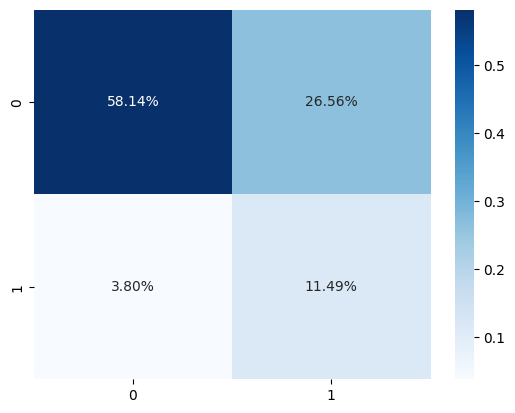

In [ ]:
#LR Matrix
import seaborn as sns
import numpy as np
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True,
            fmt='.2%', cmap='Blues')

##**Gradient Boosting Classifier**

(said to be more accurate than other boosting algorithms)

**ACCURACY:**
*   Correctly predicted the outcome  (whether a person has diabetes or not) for about 68.99% of the samples in the test set.

**PRECISION:**
*    For class 0 (no diabetes), the precision is approximately 94%, and for class 1 (diabetes), it's approximately 30%
* Among the samples the model predicted as not having diabetes, about 94% actually don't have diabetes, and among those predicted to have diabetes, about 30% actually have diabetes.

**RECALL:**
*   For class 0, the recall is approximately 67%, and for class 1, it's approximately 77%. This means that of all the actual samples that don't have diabetes, the model correctly identified about 67%, and of all the actual samples with diabetes, it correctly identified about 77%.

**CONFUSION MATRIX:**
*  Model correctly predicted 131,169 instances of class 0 (no diabetes) and 27,167 instances of class 1 (diabetes), but misclassified 63,208 instances of class 0 and 7,830 instances of class 1.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the GradientBoostingClassifier
gb_classifier.fit(X_train_minmax, y_train_minmax)

# Make predictions
y_pred = gb_classifier.predict(X_test_minmax)

#performance metrics
print("Accuracy:", accuracy_score(y_test_minmax, y_pred))
print("\nClassification Report:\n", classification_report(y_test_minmax, y_pred))
cf_matrix2 = confusion_matrix(y_test_minmax, y_pred)
print("\nConfusion Matrix:\n", cf_matrix2)

#predictions on the training data
y_train_pred = gb_classifier.predict(X_train_minmax)

#training accuracy
training_accuracy = accuracy_score(y_train_minmax, y_train_pred)
print("Training Accuracy:", training_accuracy)

Accuracy: 0.6899953807403018

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.79    194377
           1       0.30      0.77      0.43     35097

    accuracy                           0.69    229474
   macro avg       0.62      0.72      0.61    229474
weighted avg       0.84      0.69      0.73    229474


Confusion Matrix:
 [[131169  63208]
 [  7930  27167]]
Training Accuracy: 0.7378408410975297


### GB CONFUSION MATRIX:
* 57.16% of the GB instances are correctly classified as non-diabetic while approximately 11.84% of GB instances are classified as diabetic. Approximately 27.54% of GB instances are incorrectly classified as non-diabetic while 3.46% of the instances are incorrectly classified as diabetic.


<Axes: >

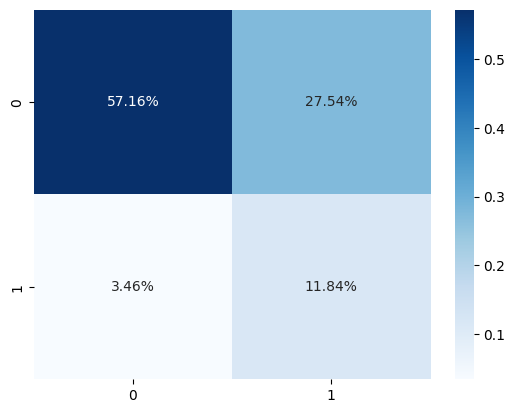

In [ ]:
#Gradient Boosting Matrix
import seaborn as sns
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True,
            fmt='.2%', cmap='Blues')

###**CATBoost**

**ACCURACY:**
*   Correctly predicted the outcome  (whether a person has diabetes or not) for about 69.08% of the samples in the test set.

**PRECISION:**
*    For class 0 (no diabetes), the precision is approximately 94%, and for class 1 (diabetes), it's approximately 30%
* Among the samples the model predicted as not having diabetes, about 94% actually don't have diabetes, and among those predicted to have diabetes, about 30% actually have diabetes.

**RECALL:**
*   For class 0, the recall is approximately 68%, and for class 1, it's approximately 77%. This means that of all the actual samples that don't have diabetes, the model correctly identified about 68%, and of all the actual samples with diabetes, it correctly identified about 77%.

**CONFUSION MATRIX:**
*  Model correctly predicted 131,538 instances of class 0 (no diabetes) and 26,998 instances of class 1 (diabetes), but misclassified 62,839 instances of class 0 and 8,099 instances of class 1.

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42)

# Train the CatBoostClassifier
catboost_classifier.fit(X_train_minmax, y_train_minmax)

# Make predictions
y_pred_catboost = catboost_classifier.predict(X_test_minmax)

# Performance metrics
print("Accuracy:", accuracy_score(y_test_minmax, y_pred_catboost))
print("\nClassification Report:\n", classification_report(y_test_minmax, y_pred_catboost))
cf_matrix3 = confusion_matrix(y_test_minmax, y_pred_catboost)
print("\nConfusion Matrix:\n", cf_matrix3)

# Predictions on the training data
y_train_pred_catboost = catboost_classifier.predict(X_train_minmax)

# Training accuracy
training_accuracy_catboost = accuracy_score(y_train_minmax, y_train_pred_catboost)
print("Training Accuracy:", training_accuracy_catboost)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.1 MB/s eta 0:00:00
0:	learn: 0.6738553	total: 85.1ms	remaining: 8.43s
1:	learn: 0.6578066	total: 129ms	remaining: 6.32s
2:	learn: 0.6443910	total: 156ms	remaining: 5.04s
3:	learn: 0.6333939	total: 176ms	remaining: 4.23s
4:	learn: 0.6236549	total: 205ms	remaining: 3.9s
5:	learn: 0.6154222	total: 234ms	remaining: 3.66s
6:	learn: 0.6085848	total: 291ms	remaining: 3.86s
7:	learn: 0.6024160	total: 334ms	remaining: 3.85s
8:	learn: 0.5969732	total: 382ms	remaining: 3.86s
9:	learn: 0.5923219	total: 427ms	remaining: 3.85s
10:	learn: 0.5872777	total: 471ms	remaining: 3.81s
11:	learn: 0.5831589	total: 505ms	remaining: 3.7s
12:	learn: 0.5795867	total: 521ms	remaining: 3.48s
13:	learn: 0.5763642	total: 556ms	remaining: 3.41s
14:	learn: 0.5732330	total: 573ms	remaining: 3.25s
15:	learn: 0.5703343	total: 589ms	remaining: 3.09s
16:	learn: 0.5681072	total: 613ms	remaining: 3s
17:	learn: 0.5657470	total: 655ms	remaining: 2.98s
18:	learn: 0.563

### CATBoost CONFUSION MATRIX:
* 57.32% of the CATBoost instances are correctly classified as non-diabetic, and approximately 11.77% of CATBoost instances are classified as diabetic. Approximately 27.38% are incorrectly classified as non-diabetic while 3.53% of the instances are incorrectly classified as diabetic.



<Axes: >

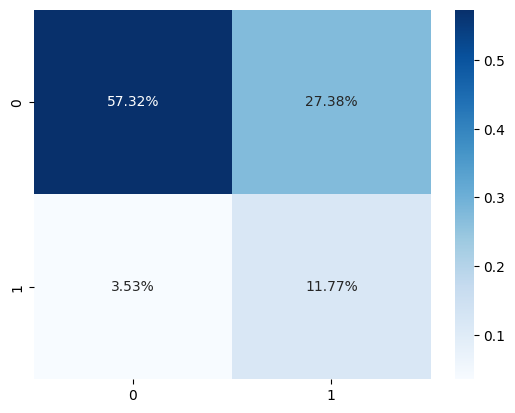

In [ ]:
#CATBoost matrix
import seaborn as sns
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True,
            fmt='.2%', cmap='Blues')

##**Neural Networks**

**ACCURACY:**
*   Correctly predicted the outcome  (whether a person has diabetes or not) for about 72.40% of the samples in the test set.

**PRECISION:**
*    For class 0 (no diabetes), the precision is approximately 93%, and for class 1 (diabetes), it's approximately 32%
* Among the samples the model predicted as not having diabetes, about 93% actually don't have diabetes, and among those predicted to have diabetes, about 32% actually have diabetes.

**RECALL:**
*   For class 0, the recall is approximately 73%, and for class 1, it's approximately 72%. This means that of all the actual samples that don't have diabetes, the model correctly identified about 73%, and of all the actual samples with diabetes, it correctly identified about 72%.

**CONFUSION MATRIX:**
*  Model correctly predicted 141,014 instances of class 0 (no diabetes) and 25,129 instances of class 1 (diabetes), but misclassified 53,363 instances of class 0 and 9,968 instances of class 1.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_minmax.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_minmax, y_train_minmax, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_minmax, y_test_minmax)
print(f'Test Accuracy: {accuracy}')
print(f'Loss:{loss}')

# Make predictions
predictions = model.predict(X_test_minmax)

# Evaluate the model on training data
_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy}')

Epoch 1/10
1755/1755 [==============================] - 20s 8ms/step - loss: 0.5498 - accuracy: 0.7135 - val_loss: 0.7038 - val_accuracy: 0.6383
Epoch 2/10
1755/1755 [==============================] - 15s 9ms/step - loss: 0.5319 - accuracy: 0.7266 - val_loss: 0.5575 - val_accuracy: 0.7503
Epoch 3/10
1755/1755 [==============================] - 14s 8ms/step - loss: 0.5286 - accuracy: 0.7284 - val_loss: 0.6915 - val_accuracy: 0.6509
Epoch 4/10
1755/1755 [==============================] - 9s 5ms/step - loss: 0.5269 - accuracy: 0.7305 - val_loss: 0.7260 - val_accuracy: 0.6039
Epoch 5/10
1755/1755 [==============================] - 7s 4ms/step - loss: 0.5254 - accuracy: 0.7291 - val_loss: 0.6415 - val_accuracy: 0.6897
Epoch 6/10
1755/1755 [==============================] - 8s 4ms/step - loss: 0.5244 - accuracy: 0.7312 - val_loss: 0.6808 - val_accuracy: 0.6566
Epoch 7/10
1755/1755 [==============================] - 8s 5ms/step - loss: 0.5239 - accuracy: 0.7322 - val_loss: 0.6850 - val_accura

In [ ]:
print(predictions)
print(predictions.shape)

[[0.7856404 ]
 [0.03803575]
 [0.5903558 ]
 ...
 [0.07517068]
 [0.34350315]
 [0.64746326]]
(229474, 1)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert predictions to binary labels (0 or 1) based on a threshold of 0.5
binary_predictions = np.where(predictions >= 0.5, 1, 0)

# Generate a classification report
report = classification_report(y_test_minmax, binary_predictions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_minmax, binary_predictions)

# Print the classification report and confusion matrix
print('Classification report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Classification report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83    194377
           1       0.33      0.69      0.45     35097

    accuracy                           0.74    229474
   macro avg       0.63      0.72      0.64    229474
weighted avg       0.84      0.74      0.77    229474

Confusion Matrix:
[[144530  49847]
 [ 10729  24368]]


### NEURAL NETWORKS CONFUSION MATRIX:
* 61.45% of the Neural Network instances are correctly classified as non-diabetic, and approximately 10.95% of Neural Network instances are classified as diabetic. Approximately 23.25% are incorrectly classified as non-diabetic while 4.34% of the instances are incorrectly classified as diabetic.
* The Neural Networks predicted the highest number of true positives out of all models, indicating that it is effective in predicting people who are diabetic.
* However, it also has a high number of false positives which may lead to undetected cases of diabetes.

<Axes: >

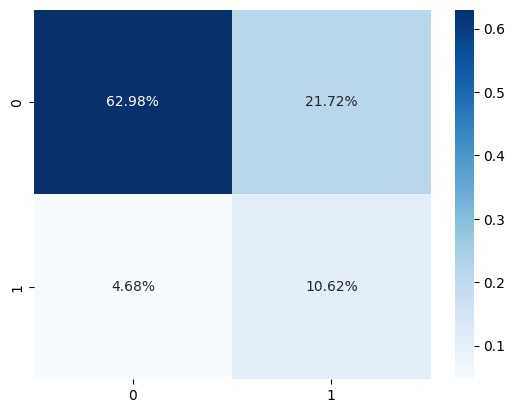

In [ ]:
#Neural Network matrix
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

##**Conclusion**

* Out of all the algorithms, Neural Networks outperformed all models with a testing accuracy of 72.73%
* This project leveraged four predictive modeling algorithms to identify risks and enhance Type II Diabetes management through predictive data science solutions.
* Out of all algorithms, our hypothesis of Neural Networks outperforming all algorithms was validated, encouraging healthcare researchers and organizations to prioritize further investigation of Neural Network models
* Although our plans to implement Lazy Predict failed, we highly recommend that researchers and other healthcare organizations investigate and apply Lazy Predict in their assessments to accelerate the model selection process
*  It is important to recognize that the testing dataset has an imbalance between the diabetic and non-diabetic classes; there are more non-diabetic individuals in the testing dataset which ultimately skews prediction outcomes.
* Besides encouraging Neural Network implementation, other promising algorithms include Random Forest or Support Vector Machines
*  Our project still informs healthcare organizations, providers, researchers, and policymakers of suggested algorithms to implement or preprocessing techniques to consider in their investigations. Additionally, insights from our visualizations assist in insurance or policy development and help healthcare providers prioritize resources and interventions for high-risk individuals, optimizing healthcare delivery and outcomes




##**References**

* Acharya, N. (2024, February 15). Understanding Precision, Recall, F1-score, and Support in  Machine Learning Evaluation. Medium. https://medium.com/@nirajan.acharya666/understanding-precision-recall-f1-score-and-support-in-machine-learning-evaluation-7ec935e8512e#:~:text=It's%20like%20a%20 balance%20between,of%20 instances%20in%20 each%20 class.
* CDC. (2023, September 5). What is Diabetes? Centers for Disease Control and Prevention. Retrieved March 21, 2024, from https://www.cdc.gov/diabetes/basics/diabetes.html
* El Seddawy, A. I., Karim, F. K., Hussein, A. M., & Khafaga, D. S. (2022). Predictive Analysis of Diabetes-Risk with Class Imbalance. National Library of Medicine. Retrieved March 21, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9578843/
* Ganie, S. M., & Malik, M. B. (2022). An Ensemble Machine Learning Approach for Predicting Type-II Diabetes Mellitus Based on Lifestyle Indicators. Science Direct. Retrieved April 26, 2024, from https://www.sciencedirect.com/science/article/pii/S2772442522000399
* GeeksforGeeks. (2024, April 29). CatBoost in Machine Learning. Retrieved April 29, 2024, from https://www.geeksforgeeks.org/catboost-ml/
* GeeksforGeeks. (2023, March 31). Gradient Boosting in ML. GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/
* GeeksforGeeks. (2024, January 3). What is a Neural Network? GeeksforGeeks. https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/
* Joshi, T. N., & Chawan, P. M. (2018). Diabetes Prediction Using Machine Learning Techniques. Ijera. Retrieved April 26, 2024, from https://www.ijera.com/papers/Vol8_issue1/Part-2/C0801020913.pdf
* Mujumdar, A., & Vaidehi, V. (n.d.). Diabetes Prediction using Machine Learning Algorithms. Science Direct. Retrieved March 21, 2024, from https://www.sciencedirect.com/science/article/pii/S1877050920300557
* Qin, Y., Wu, J., Xiao, W., Wang, K., Huang, A., Liu, B., Yu, J., Li, C., Yu, F., & Ren, Z. (2022). Machine Learning Models for Data-Driven Prediction of Diabetes by Lifestyle Type. National Library of Medicine. Retrieved March 21, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9690067/
* Saxena, S. (2023, September 13). Binary Cross Entropy/Log loss for binary classification. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=Binary%20Cross%20 Entropy%2C%20 also%20 known,binary%20 labels%20of%20a%20 dataset.
* Simple and Reliable Early Prediction of Diabetes. (2024, January 19). ScienceDaily. Retrieved April 30, 2024, from https://www.sciencedaily.com/releases/2024/01/240119122708.htm#:~:text=Josef%20Hospital%20in%20%20Bochum%2C%20%20Germany,on%20%20January%2C%202%2C%202024
* T, D. (2021, December 11). Confusion Matrix Visualization - Dennis T - Medium. Medium. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
* Tasin, I., Nabil, T. U., Islam, S., & Khan, R. (2023). Diabetes Prediction Using Machine Learning and Explainable AI Techniques. National Library of Medicine. Retrieved March 21, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10107388/
* Teboul, A. (2022). Diabetes Health Indicators Dataset. Kaggle. Retrieved April 26, 2024, from https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data
* Tu J. V. (1996). Advantages and disadvantages of using artificial neural networks versus logistic regression for predicting medical outcomes. Journal of Clinical Epidemiology, 49(11), 1225–1231. https://doi.org/10.1016/s0895-4356(96)00002-9
* UC Business Analytics. (n.d.). Feedforward Deep Learning Models. UC Business Analytics R Programming Guide. Retrieved April 30, 2024, from https://uc-r.github.io/feedforward_DNN
* Vishwakarma, N. (2024, April 26). What is Adam Optimizer? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/#:~:text=The%20Adam%20 optimizer%2C%20short%20 for,Stochastic%20 Gradient%20 Descent%20with%20 momentum.
* Yahyaoui, A., Jamil, A., Rasheed, J., & Yesiltepe, M. (2020, January 23). A Decision Support System for Diabetes Prediction Using Machine Learning and Deep Learning Techniques. IEEE Xplore. Retrieved March 21, 2024, from https://ieeexplore.ieee.org/abstract/document/8965556
